<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Analisis_Sentimen_Media_Sosial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [16]:
# Download necessary nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 encoding='latin-1',
                 names=['target', 'id', 'date', 'flag', 'user', 'text'],
                 on_bad_lines='skip',
                 quoting=3)

In [5]:
df = df.sample(n=10000, random_state=42)

In [6]:
# Display the first few rows
df.head()

,target,id,date,flag,user,text
"""0""","""1687588969""","""Sun May 03 09:05:26 PDT 2009""","""NO_QUERY""","""Kasnuffle""","""Wow...La Roux!! Great Band",Can't get enough. Got enough pennies for the ...
"""0""","""1970129995""","""Sat May 30 02:34:35 PDT 2009""","""NO_QUERY""","""Kaulitzanator""","""yesterday i burnt my finger with ice cream an...",NaN
"""0""","""1553202318""","""Sat Apr 18 13:38:26 PDT 2009""","""NO_QUERY""","""DJJazzimus""","""@#asot400 I can't get any stream video or sou...",NaN
"""0""","""1834575923""","""Mon May 18 03:27:36 PDT 2009""","""NO_QUERY""","""jenniferhiggs""","""Sad my stay in FL is over """,NaN
"""0""","""1983056168""","""Sun May 31 12:25:11 PDT 2009""","""NO_QUERY""","""lau_rie""","""paper talk say barry is going to man city """,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, "0" to "0"
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  object
 1   id      10000 non-null  object
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   text    1788 non-null   object
dtypes: object(6)
memory usage: 804.9+ KB


In [8]:
# Drop unnecessary columns
df = df.drop(['id', 'date', 'flag', 'user'], axis=1)

In [9]:
# Rename target for better understanding
df['target'] = df['target'].replace({0: 'negative', 4: 'positive'})

In [10]:
# Checking for missing values
df.isnull().sum()

,0
target,0
text,8212


In [11]:
# Basic statistics about the data
print(df['target'].value_counts())

target
"1687588969"    1
"1964243861"    1
"1835375114"    1
"1835073652"    1
"1965914946"    1
               ..
"1759269111"    1
"1695279182"    1
"1964228733"    1
"1980222716"    1
"1990432251"    1
Name: count, Length: 10000, dtype: int64


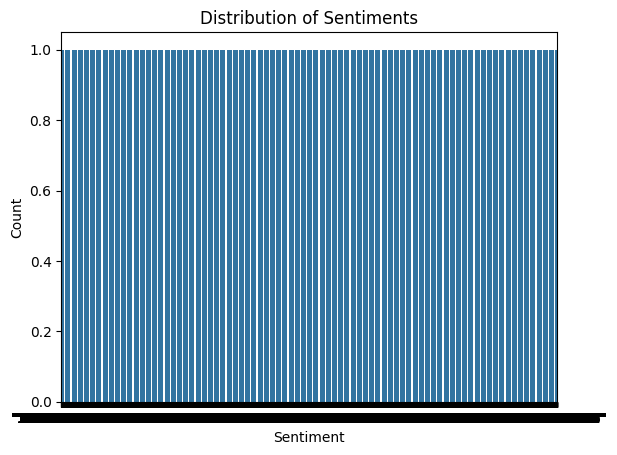

In [12]:
# Visualizing the distribution of target classes
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
# Text cleaning and pre-processing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [18]:
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove usernames
        text = re.sub(r'@\w+', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Tokenization
        words = word_tokenize(text.lower())
        # Remove stopwords and lemmatize
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        # Handle non-string values, e.g., return an empty string or NaN
        return ''  # or pd.NA

In [19]:
# Applying the cleaning function to text
df['clean_text'] = df['text'].apply(clean_text)

In [20]:
# Displaying a few cleaned texts
df[['text', 'clean_text']].head()

,text,clean_text
"""0""",Can't get enough. Got enough pennies for the ...,cant get enough got enough penny album go well...
"""0""",NaN,
"""0""",NaN,
"""0""",NaN,
"""0""",NaN,


In [25]:
# WordCloud for positive and negative words
positive_words = ' '.join(df[df['target'] == 'pos']['clean_text'])

if not positive_words:
    print("Warning: positive_words is empty. Check your data and filter condition.")

negative_words = ' '.join(df[df['target'] == 'negative']['clean_text'])

In [27]:
# Generate WordCloud for Positive Sentiments
if positive_words.strip():
    wordcloud_positive = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(positive_words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Word Cloud for Positive Sentiments')
    plt.axis('off')
    plt.show()
else:
    print("No positive words available to generate a word cloud.")

No positive words available to generate a word cloud.


In [28]:
if negative_words.strip():
    wordcloud_negative = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600).generate(negative_words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Word Cloud for Negative Sentiments')
    plt.axis('off')
    plt.show()
else:
    print("No negative words available to generate a word cloud.")

No negative words available to generate a word cloud.


In [29]:
# Text Length Analysis
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

In [31]:
# Most Common Words by Sentiment
def plot_common_words(df, sentiment, title):
    words = df[df['target'] == sentiment]['clean_text'].str.split(expand=True).stack().value_counts().head(20)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=words.values, y=words.index)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

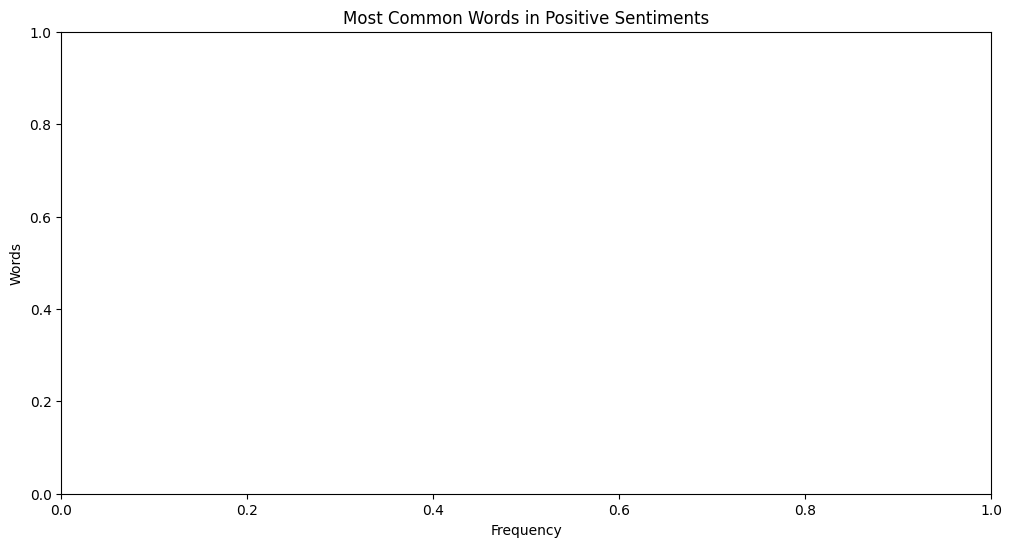

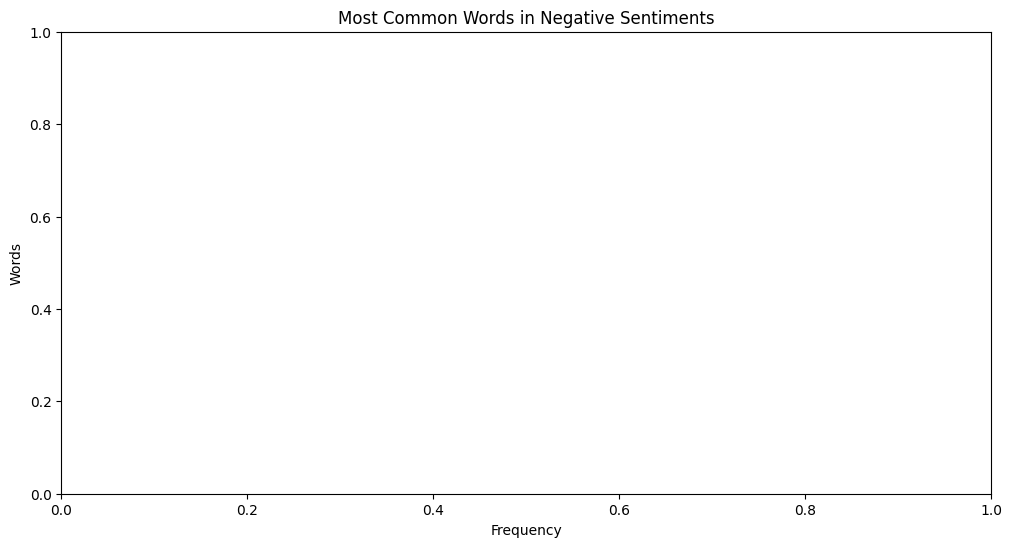

In [32]:
plot_common_words(df, 'positive', 'Most Common Words in Positive Sentiments')
plot_common_words(df, 'negative', 'Most Common Words in Negative Sentiments')

In [34]:
# Word frequency for both positive and negative texts
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Using CountVectorizer to identify word frequency
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
word_freq_df = pd.DataFrame({'Words': vectorizer.get_feature_names_out(), 'Frequency': X.sum(axis=0).tolist()[0]})

In [36]:
# Displaying word frequency
display(word_freq_df.sort_values(by='Frequency', ascending=False))

,Words,Frequency
7,im,166
4,dont,86
2,day,66
9,like,62
19,work,57
6,got,55
0,amp,48
16,time,47
11,miss,45
15,sad,45


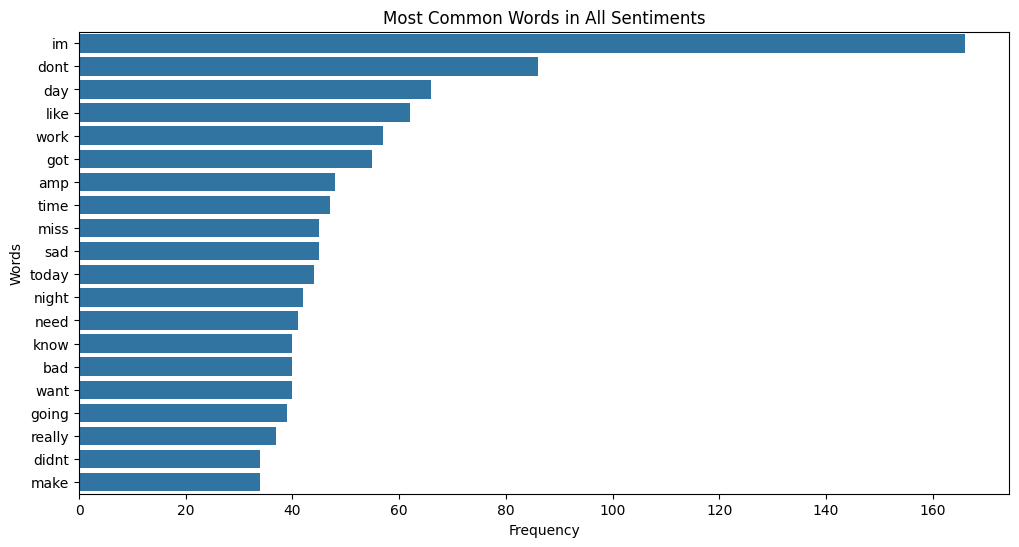

In [37]:
# Visualize word frequency
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Words', data=word_freq_df.sort_values(by='Frequency', ascending=False))
plt.title('Most Common Words in All Sentiments')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [38]:
# Summary statistics for text length by sentiment
summary_stats = df.groupby('target')['text_length'].describe()
print(summary_stats)

              count  mean  std   min   25%   50%   75%   max
target                                                      
"1467812771"    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
"1467836576"    1.0   8.0  NaN   8.0   8.0   8.0   8.0   8.0
"1467839450"    1.0   0.0  NaN   0.0   0.0   0.0   0.0   0.0
"1467841969"    1.0   0.0  NaN   0.0   0.0   0.0   0.0   0.0
"1467876652"    1.0  12.0  NaN  12.0  12.0  12.0  12.0  12.0
...             ...   ...  ...   ...   ...   ...   ...   ...
"1992165040"    1.0   2.0  NaN   2.0   2.0   2.0   2.0   2.0
"1992179264"    1.0   0.0  NaN   0.0   0.0   0.0   0.0   0.0
"1992185228"    1.0   0.0  NaN   0.0   0.0   0.0   0.0   0.0
"1992191660"    1.0   0.0  NaN   0.0   0.0   0.0   0.0   0.0
"1992201867"    1.0   0.0  NaN   0.0   0.0   0.0   0.0   0.0

[10000 rows x 8 columns]
